# Corridor Travel Times

### Define 2 comparison scenario locations

In [56]:
scen1_loc = r'U:\Stefan\Soundcast_feb_twg'
scen2_loc = r'S:\Stefan\soundcast_10peak_5offpeak'

current_run_name = 'soundcast_2014'
scen1_name = '2014_base'
scen2_name = '10peak_5offpeak'

# Set comparison scenario:
compare_scen = scen2_name

In [2]:
import os
import pandas as pd
import h5py
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Link Travel Times

In [57]:
# corridors using .in files

run_df = pd.read_excel(r'..\..\..\outputs\network_summary_detailed.xlsx', sheetname='Corridors').drop('length', axis=1)
scen1_df = pd.read_excel(os.path.join(scen1_loc,r'outputs\network_summary_detailed.xlsx'), sheetname='Corridors').drop('length', axis=1)
scen2_df = pd.read_excel(os.path.join(scen2_loc,r'outputs\network_summary_detailed.xlsx'), sheetname='Corridors').drop('length', axis=1)

In [4]:
# merge scenarios 
df = pd.merge(run_df, scen1_df, on=['Corridor Input File','Local ID','full_id','tod'], suffixes=['_'+current_run_name, '_'+scen1_name])
df.rename(columns={'auto_time_'+current_run_name:current_run_name,'auto_time_'+scen1_name:scen1_name}, inplace=True)
df = pd.merge(df, scen2_df, on=['Corridor Input File','Local ID','full_id','tod'])
df.rename(columns={'auto_time':scen2_name}, inplace=True)

df[['Local ID','full_id']] = df[['Local ID','full_id']].astype('int')

In [5]:
# Merge with observed
obs = pd.read_csv(r'..\..\..\scripts\summarize\inputs\network_summary\corridor_travel_times.csv')
df = pd.merge(df,obs,left_on=['Corridor Input File','Local ID','tod'], right_on=['corridor','direction_id','tod'])

### Model vs observed

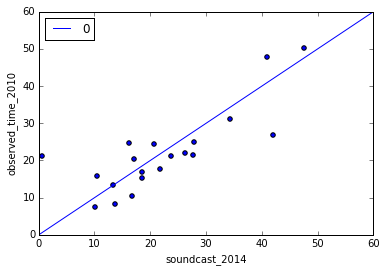

In [6]:
model_run = current_run_name

# For validation
import matplotlib.pyplot as plt
maxtime = 60
ax = df.plot(kind='scatter', x=model_run, y='observed_time_2010', xlim=[0,maxtime], ylim=[0,maxtime])

# reference line 
ref = pd.DataFrame([0,maxtime],[0,maxtime])
ref.plot(ax=ax)

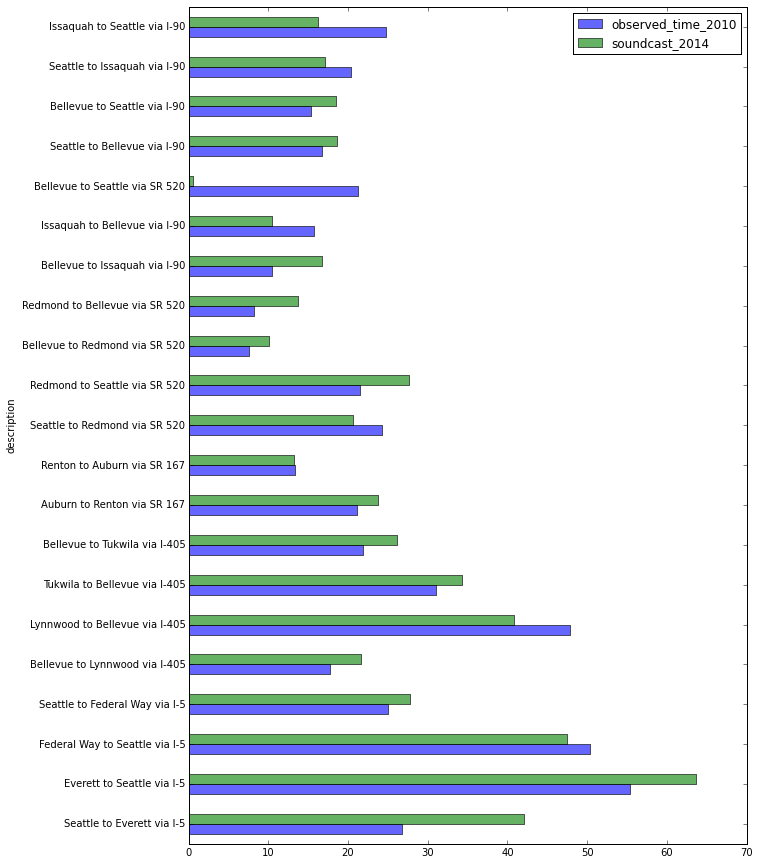

In [7]:
validation_df = df[['description','observed_time_2010',model_run]]
validation_df.index = validation_df.description
validation_df['Change (minutes)'] = validation_df[model_run] - validation_df['observed_time_2010']
validation_df['% Change'] = (validation_df[model_run] - validation_df['observed_time_2010'])/validation_df['observed_time_2010']
validation_df[['observed_time_2010',model_run]].plot(kind='barh', figsize=(10,15), alpha=0.6)

### Run vs Scenario

In [8]:
compare_df = df[[current_run_name,compare_scen]]
compare_df.index = df.description
compare_df['Change (minutes)'] = compare_df[compare_scen] - compare_df[current_run_name]
compare_df['% Change'] = (compare_df[compare_scen] - compare_df[current_run_name])/compare_df[current_run_name]
compare_df

,soundcast_2014,10peak_5offpeak,Change (minutes),% Change
description,,,,
Seattle to Everett via I-5,42.034000,35.608445,-6.425555,-0.152866
Everett to Seattle via I-5,63.659705,48.649711,-15.009994,-0.235785
Federal Way to Seattle via I-5,47.464196,40.950104,-6.514092,-0.137242
Seattle to Federal Way via I-5,27.769661,25.240065,-2.529596,-0.091092
Bellevue to Lynnwood via I-405,21.670139,20.770385,-0.899754,-0.041520
Lynnwood to Bellevue via I-405,40.883362,35.903141,-4.980221,-0.121815
Tukwila to Bellevue via I-405,34.288670,22.837504,-11.451166,-0.333964
Bellevue to Tukwila via I-405,26.206000,18.456346,-7.749654,-0.295721
Auburn to Renton via SR 167,23.763551,25.502637,1.739086,0.073183


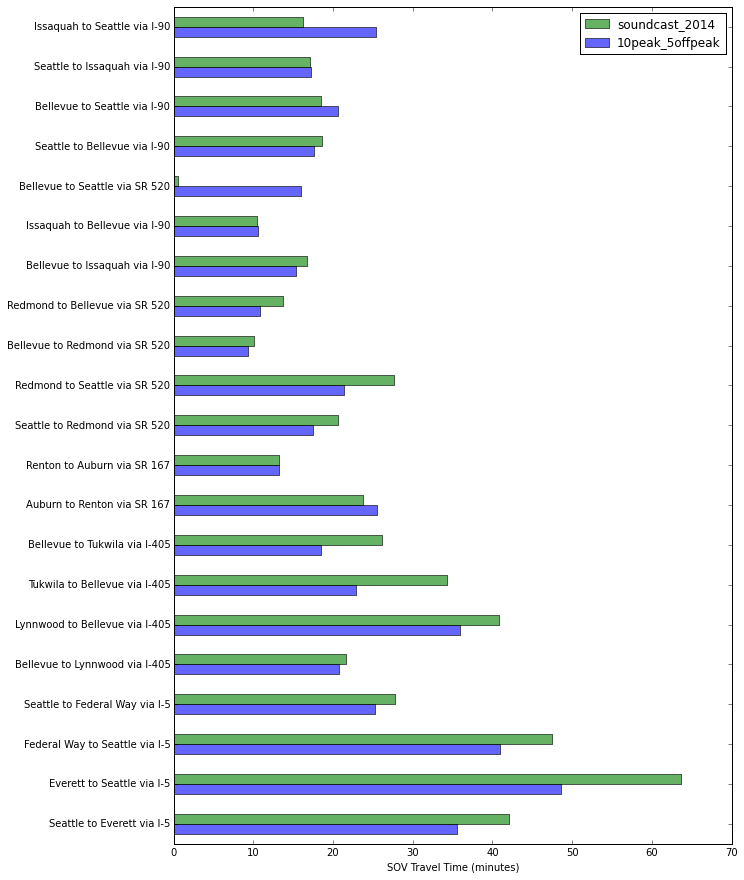

In [9]:
df.index = df.description
ax = df[[compare_scen,current_run_name]].plot(kind='barh', figsize=(10,15), alpha=0.6)

# Change order of labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')  # reverse both handles and labels
ax.yaxis.label.set_visible(False)    # hide y axis labels
ax.set_xlabel('SOV Travel Time (minutes)')

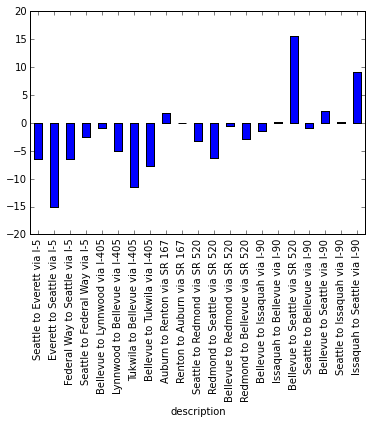

In [10]:
compare_df['Change (minutes)'].plot(kind='bar')

## Scenario vs Scenario

In [11]:
compare_df = df[[scen1_name,scen2_name]]
compare_df.index = df.description
compare_df['Change (minutes)'] = compare_df[scen2_name] - compare_df[scen1_name]
compare_df['% Change'] = (compare_df[scen2_name] - compare_df[scen1_name])/compare_df[scen1_name]
compare_df

,2040_no_tolls,10peak_5offpeak,Change (minutes),% Change
description,,,,
Seattle to Everett via I-5,38.480593,35.608445,-2.872148,-0.074639
Everett to Seattle via I-5,52.183314,48.649711,-3.533602,-0.067715
Federal Way to Seattle via I-5,44.785897,40.950104,-3.835793,-0.085647
Seattle to Federal Way via I-5,26.723916,25.240065,-1.483851,-0.055525
Bellevue to Lynnwood via I-405,22.490823,20.770385,-1.720438,-0.076495
Lynnwood to Bellevue via I-405,38.709404,35.903141,-2.806263,-0.072496
Tukwila to Bellevue via I-405,25.175834,22.837504,-2.338331,-0.092880
Bellevue to Tukwila via I-405,19.773659,18.456346,-1.317313,-0.066620
Auburn to Renton via SR 167,27.468212,25.502637,-1.965575,-0.071558


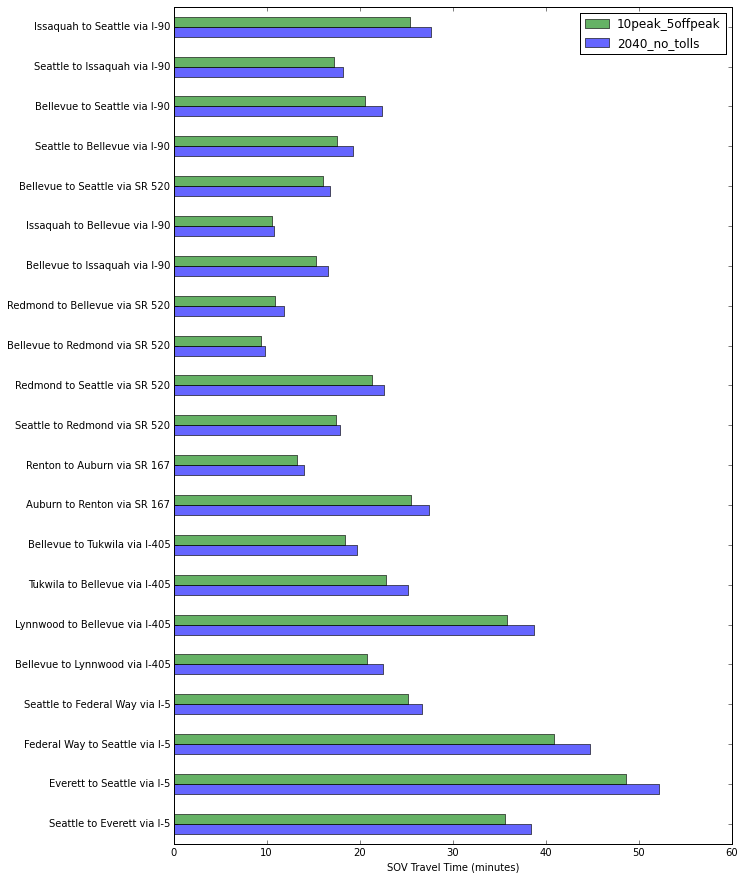

In [12]:
df.index = df.description
ax = df[[scen1_name,scen2_name]].plot(kind='barh', figsize=(10,15), alpha=0.6)

# Change order of labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')  # reverse both handles and labels
ax.yaxis.label.set_visible(False)    # hide y axis labels
ax.set_xlabel('SOV Travel Time (minutes)')

# O-D SOV Travel Times

In [3]:
# Load observed data (2017)
od_obs = pd.read_csv(r'..\..\..\scripts\summarize\inputs\network_summary\od_travel_times.csv')

In [4]:
skim_name = '7to8'
user_class = 'svtl1t'
scen_name = '2014'
max_internal_zone = 3700
zone_list = [532,1552,1356]
results = pd.DataFrame()
run_dict = {'run': current_run_name,
            scen1_loc: scen1_name,
           scen2_loc: scen2_name}

# Need zone terminal times to compare to observed
o_tt = pd.read_csv(r'..\..\..\inputs\IntraZonals\origin_tt.in',
                   sep=' ',header=4)


o_tt.index = o_tt.index.get_level_values(1)
o_tt['taz'] = o_tt.index
o_tt['terminal_time'] = o_tt['matrix=mo"prodtt"']
o_tt = pd.DataFrame(o_tt[['terminal_time','taz']])

for run_dir, current_run_name in run_dict.iteritems():
    skims_dir = run_dir + r'\inputs'
    if run_dir == 'run':
        h5_contents = h5py.File(r'..\..\..\inputs' + r'\\' + skim_name + '.h5')
    else:
        h5_contents = h5py.File(skims_dir + r'\\' + skim_name + '.h5')
    for zone in zone_list:
        df = pd.DataFrame()
        df[user_class] = h5_contents['Skims'][user_class][:][zone-1,:max_internal_zone]
        df['otaz'] = zone
        df['dtaz'] = df.index+1
        df['travel_time'] = df[user_class]/100 # skim data is stored in hundreds
        
        df = df[df['dtaz'].isin(zone_list)]
        
#      Subtract the terminal times
        df = pd.merge(df,o_tt,left_on='dtaz',right_on='taz')
        # Subtract destination terminal time
        df['travel_time'] = df['travel_time']-df['terminal_time']
        # Subtract origin terminal time
        df['travel_time'] = df['travel_time']-(o_tt[o_tt['taz'] == zone]['terminal_time'].values[0])
               
        df['source'] = current_run_name
        results = results.append(df)

In [5]:
scen1 = results[results['source'] == current_run_name][['travel_time','otaz','dtaz']]
scen2 = results[results['source'] == scen1_name][['travel_time','otaz','dtaz']]
scen3 = results[results['source'] == scen2_name][['travel_time','otaz','dtaz']]

df = pd.merge(scen1, scen2, on=['otaz','dtaz'], suffixes=["_"+current_run_name,"_"+scen1_name])

df = pd.merge(df, scen3, on=['otaz','dtaz'], suffixes=["_"+current_run_name,"_"+scen2_name])
df.rename(columns={'travel_time':'travel_time_'+scen2_name}, inplace=True)

df.rename(columns={'travel_time_'+scen1_name:scen1_name,
                  'travel_time_'+scen2_name:scen2_name,
                  'travel_time_'+current_run_name:current_run_name}, inplace=True)

df = pd.merge(df, od_obs[['otaz','dtaz','description','time_cong']], on=['otaz','dtaz'])
df.index = df['description']
df.rename(columns={'time_cong':'observed'},inplace=True)
df

,soundcast_2014,otaz,dtaz,2040_no_tolls,10peak_5offpeak,description,observed
description,,,,,,,
Seattle-Renton,21.02,532,1356,23.71,23.11,Seattle-Renton,17.716667
Seattle-Bellevue,18.54,532,1552,23.25,22.10,Seattle-Bellevue,14.533333
Bellevue-Seattle,17.65,1552,532,25.93,24.65,Bellevue-Seattle,13.950000
Bellevue-Renton,17.09,1552,1356,16.72,15.92,Bellevue-Renton,13.550000
Renton-Seattle,25.89,1356,532,30.60,29.41,Renton-Seattle,17.233333
Renton-Bellevue,24.96,1356,1552,24.72,23.29,Renton-Bellevue,14.500000


## AM Travel Times

In [6]:
df[['description',current_run_name,scen1_name,scen2_name]]

,description,soundcast_2014,2040_no_tolls,10peak_5offpeak
description,,,,
Seattle-Renton,Seattle-Renton,21.02,23.71,23.11
Seattle-Bellevue,Seattle-Bellevue,18.54,23.25,22.10
Bellevue-Seattle,Bellevue-Seattle,17.65,25.93,24.65
Bellevue-Renton,Bellevue-Renton,17.09,16.72,15.92
Renton-Seattle,Renton-Seattle,25.89,30.60,29.41
Renton-Bellevue,Renton-Bellevue,24.96,24.72,23.29


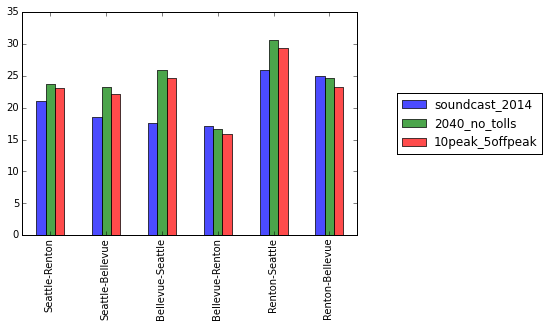

In [7]:
ax = df[[current_run_name,scen1_name,scen2_name]].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")

## Travel Times Today
note that itrazonal times should be subtracted for accurate comparison

In [8]:
df[[current_run_name,scen1_name,scen2_name,'observed']]

,soundcast_2014,2040_no_tolls,10peak_5offpeak,observed
description,,,,
Seattle-Renton,21.02,23.71,23.11,17.716667
Seattle-Bellevue,18.54,23.25,22.10,14.533333
Bellevue-Seattle,17.65,25.93,24.65,13.950000
Bellevue-Renton,17.09,16.72,15.92,13.550000
Renton-Seattle,25.89,30.60,29.41,17.233333
Renton-Bellevue,24.96,24.72,23.29,14.500000


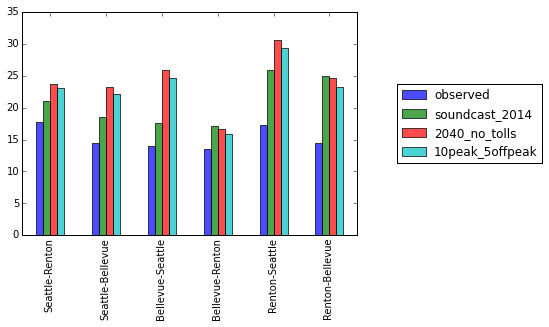

In [9]:
ax = df[['description','observed',current_run_name,scen1_name,scen2_name]].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")

# O-D Transit Travel Times

In [58]:
skim_name = '7to8'
scen_name = '2014'
max_internal_zone = 3700
zone_list = [532,1552,1356]
results = pd.DataFrame()
run_dict = {scen1_loc: scen1_name,
           scen2_loc: scen2_name}

# Need zone terminal times to compare to observed
o_tt = pd.read_csv(r'..\..\..\inputs\IntraZonals\origin_tt.in',
                   sep=' ',header=4)


o_tt.index = o_tt.index.get_level_values(1)
o_tt['taz'] = o_tt.index
o_tt['terminal_time'] = o_tt['matrix=mo"prodtt"']
o_tt = pd.DataFrame(o_tt[['terminal_time','taz']])

for run_dir, current_run_name in run_dict.iteritems():
    for mode in ['a','r']:
        # ivtwa is bus-only transit assignment nest;
        # ivtwr is light-rail + bus assignment nest;
        # take the min travel time between the two
        user_class = 'ivtw' + mode
        skims_dir = run_dir + r'\inputs'
        if run_dir == 'run':
            h5_contents = h5py.File(r'..\..\..\inputs' + r'\\' + skim_name + '.h5')
        else:
            h5_contents = h5py.File(skims_dir + r'\\' + skim_name + '.h5')
        for zone in zone_list:
            df = pd.DataFrame()
            df[user_class] = h5_contents['Skims'][user_class][:][zone-1,:max_internal_zone]
            df['otaz'] = zone
            df['dtaz'] = df.index+1
            df['travel_time'] = df[user_class]/100 # skim data is stored in hundreds

            df = df[df['dtaz'].isin(zone_list)]

            df['source'] = current_run_name
            df['user_class'] = user_class
            results = results.append(df)
        
# results = results[results['otaz'] != results['dtaz']]

In [52]:
# results

In [88]:
scen1 = results[results['source'] == scen1_name][['travel_time','otaz','dtaz','user_class']]
scen2 = results[results['source'] == scen2_name][['travel_time','otaz','dtaz','user_class']]

scen1_bus = scen1[scen1['user_class'] == 'ivtwa']
scen2_bus = scen2[scen2['user_class'] == 'ivtwa']

scen1_rail = scen1[scen1['user_class'] == 'ivtwr']
scen2_rail = scen2[scen2['user_class'] == 'ivtwr']

df_bus = pd.merge(scen1_bus, scen2_bus, on=['otaz','dtaz'], suffixes=["_"+scen1_name,"_"+scen2_name])
df_rail = pd.merge(scen1_rail, scen2_rail, on=['otaz','dtaz'], suffixes=["_"+scen1_name,"_"+scen2_name])

df_bus.rename(columns={'travel_time_'+scen1_name:scen1_name,
                  'travel_time_'+scen2_name:scen2_name}, inplace=True)

df_rail.rename(columns={'travel_time_'+scen1_name:scen1_name,
                  'travel_time_'+scen2_name:scen2_name}, inplace=True)

df_bus = pd.merge(df_bus, od_obs[['otaz','dtaz','description','time_cong']], 
                  on=['otaz','dtaz'])[[scen1_name,scen2_name,'description','time_cong']]
df_bus.index = df_bus['description']
df_bus.rename(columns={'time_cong':'observed'},inplace=True)

df_rail = pd.merge(df_rail, od_obs[['otaz','dtaz','description','time_cong']], 
                   on=['otaz','dtaz'])[[scen1_name,scen2_name,'description','time_cong']]
df_rail.index = df_rail['description']
df_rail.rename(columns={'time_cong':'observed'},inplace=True)

df = pd.merge(df_bus,df_rail, left_index=True, right_index=True, suffixes=['_bus','_rail'])

In [89]:
df

,2014_base_bus,10peak_5offpeak_bus,description_bus,observed_bus,2014_base_rail,10peak_5offpeak_rail,description_rail,observed_rail
description,,,,,,,,
Seattle-Renton,30.61,30.16,Seattle-Renton,17.716667,31.22,47.81,Seattle-Renton,17.716667
Seattle-Bellevue,33.77,41.80,Seattle-Bellevue,14.533333,36.24,24.00,Seattle-Bellevue,14.533333
Bellevue-Seattle,25.97,38.22,Bellevue-Seattle,13.950000,26.02,22.00,Bellevue-Seattle,13.950000
Bellevue-Renton,17.78,27.79,Bellevue-Renton,13.550000,51.67,47.31,Bellevue-Renton,13.550000
Renton-Seattle,36.69,41.21,Renton-Seattle,17.233333,28.94,48.23,Renton-Seattle,17.233333
Renton-Bellevue,23.31,27.05,Renton-Bellevue,14.500000,67.59,47.02,Renton-Bellevue,14.500000


In [83]:
scen1_min = df[[scen1_name+'_bus',scen1_name+'_rail']].min(axis=1)
scen2_min = df[[scen2_name+'_bus',scen2_name+'_rail']].min(axis=1)

In [86]:
df = pd.DataFrame([scen1_min,scen2_min]).T
df.columns = [scen1_name,scen2_name]

In [87]:
d

,2014_base,10peak_5offpeak
description,,
Seattle-Renton,30.61,30.16
Seattle-Bellevue,33.77,24.00
Bellevue-Seattle,25.97,22.00
Bellevue-Renton,17.78,27.79
Renton-Seattle,28.94,41.21
Renton-Bellevue,23.31,27.05


### AM Transit Travel Times

,2040_no_tolls,otaz,dtaz,user_class_2040_no_tolls,10peak_5offpeak,user_class_10peak_5offpeak,description,observed
description,,,,,,,,
Seattle-Renton,30.64,532,1356,ivtwrb,28.81,ivtwrb,Seattle-Renton,17.716667
Seattle-Renton,30.64,532,1356,ivtwrb,19.00,ivtwrr,Seattle-Renton,17.716667
Seattle-Renton,11.82,532,1356,ivtwrr,28.81,ivtwrb,Seattle-Renton,17.716667
Seattle-Renton,11.82,532,1356,ivtwrr,19.00,ivtwrr,Seattle-Renton,17.716667
Seattle-Bellevue,0.00,532,1552,ivtwrb,0.00,ivtwrb,Seattle-Bellevue,14.533333
Seattle-Bellevue,0.00,532,1552,ivtwrb,24.00,ivtwrr,Seattle-Bellevue,14.533333
Seattle-Bellevue,34.31,532,1552,ivtwrr,0.00,ivtwrb,Seattle-Bellevue,14.533333
Seattle-Bellevue,34.31,532,1552,ivtwrr,24.00,ivtwrr,Seattle-Bellevue,14.533333
Bellevue-Seattle,0.00,1552,532,ivtwrb,0.00,ivtwrb,Bellevue-Seattle,13.950000


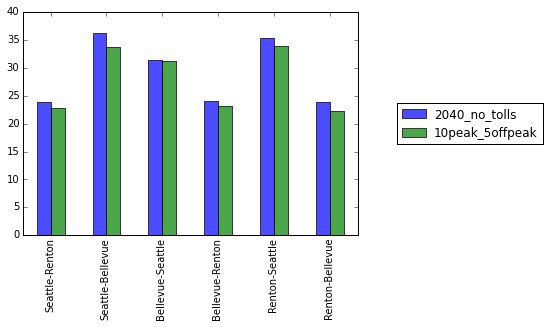

In [23]:
ax = df[[scen1_name,scen2_name]].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")